# Regression Problem - Avocado Prices Prediction

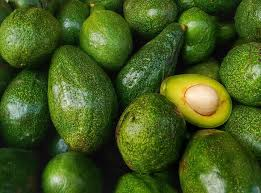

### In this notebook, I will predict the prices of avocados in the US.

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("avocado.csv")
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [144]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


### We don't need the "Unnamed: 0" column:

In [5]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [6]:
df.type.unique()

array(['conventional', 'organic'], dtype=object)

### Let's check what the average price in each region is:

In [8]:
len(df.region.unique())

54

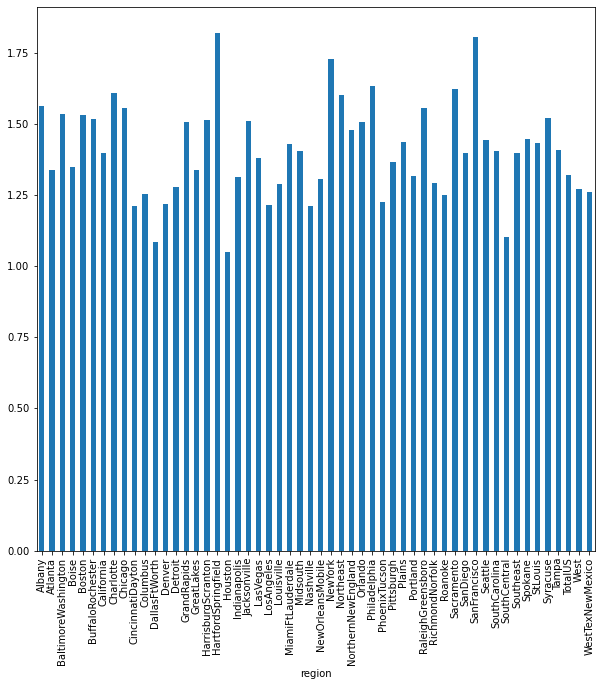

In [9]:
group_by_region = df.groupby(by=["region"])
df_avg = group_by_region.mean()
df_avg = df_avg.drop(["year"], axis=1)
df_avg.AveragePrice.sort_index().plot(kind="bar", figsize = (10,10))

### Most expensive avocados: HartfordSpringfield, San Francisco
### Cheapest avocados: Houston, SouthCentral, DallasFtWorth

## Groupby
### I decided to divide the data into two groups: one for conventional avocados, one for organic avocados, since the prices of the two types differ.

In [65]:
g = df.groupby(by="type")
df_conventional = g.get_group("conventional")
df_conventional.drop(["type"], axis = 1)
df_organic = g.get_group("organic")
df_organic.drop(["type"], axis = 1)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
9126,2015-12-27,1.83,989.55,8.16,88.59,0.00,892.80,892.80,0.00,0.0,2015,Albany
9127,2015-12-20,1.89,1163.03,30.24,172.14,0.00,960.65,960.65,0.00,0.0,2015,Albany
9128,2015-12-13,1.85,995.96,10.44,178.70,0.00,806.82,806.82,0.00,0.0,2015,Albany
9129,2015-12-06,1.84,1158.42,90.29,104.18,0.00,963.95,948.52,15.43,0.0,2015,Albany
9130,2015-11-29,1.94,831.69,0.00,94.73,0.00,736.96,736.96,0.00,0.0,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,WestTexNewMexico


## Difference between the average prices of the two types and their distribution:

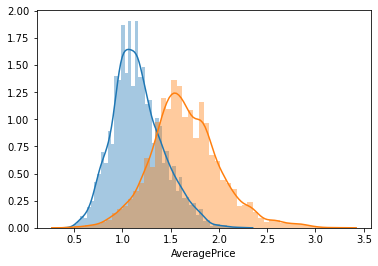

In [150]:
#f, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 4))
sns.distplot(df_conventional['AveragePrice'])
sns.distplot(df_organic['AveragePrice']) 
plt.show()

### Blue = Conventional
### Red = Organic

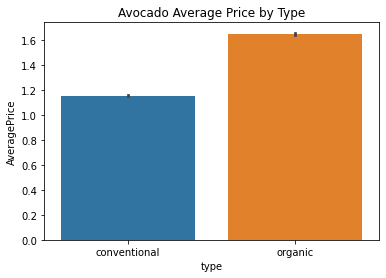

In [133]:
plt.figure()
plt.title("Avocado Average Price by Type")
sns.barplot(x="type",y="AveragePrice",data= df)
plt.show()

# Conventional
### Prices of conventional avocados throughout the years:

Text(0.5, 1.0, 'Average Price')

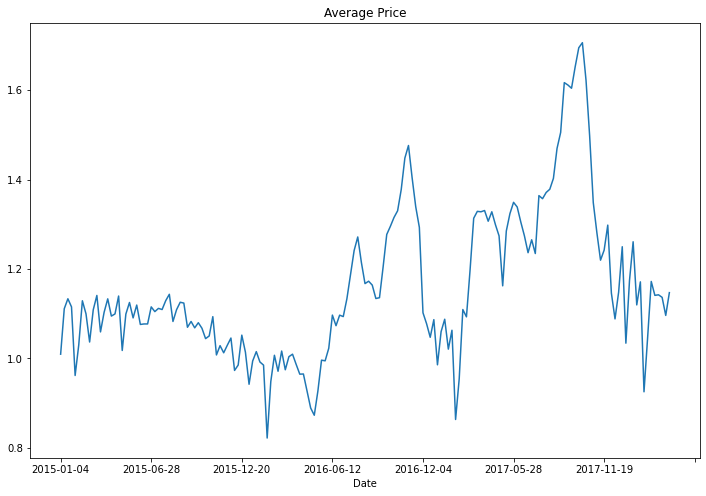

In [66]:
byDate1=df_conventional.groupby('Date').mean()
plt.figure(figsize=(12,8))
byDate1["AveragePrice"].plot()
plt.title("Average Price")

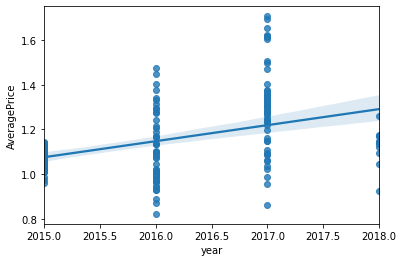

In [152]:
sns.regplot(x="year", y="AveragePrice", data=byDate1)

In [143]:
dummies1 = pd.get_dummies(df_conventional.drop(["AveragePrice"], axis = 1))
target1 = df_conventional["AveragePrice"]

## Split to Training and Testing 

In [97]:
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(dummies1,target1,test_size=0.2, random_state = 0)

## Model - Linear Regression

In [124]:
from sklearn.linear_model import LinearRegression
lr1=LinearRegression()
lr1.fit(x1_train,y1_train)
conv_pred=lr1.predict(x1_test)

## Accuracy Check

In [137]:
from sklearn import metrics
print("MAE: ", metrics.mean_absolute_error(y1_test, conv_pred))
print("MSE: ", metrics.mean_squared_error(y1_test, conv_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y1_test, conv_pred)))
print("R2: ",  metrics.r2_score(y1_test, conv_pred))

MAE:  0.09424913008239251
MSE:  0.015124494798486526
RMSE:  0.12298168480910694
R2:  0.7750927919390991


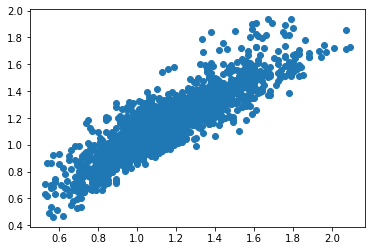

In [113]:
plt.scatter(x=y1_test,y=conv_pred)

# Organic
### Prices of organic avocados throughout the years:

Text(0.5, 1.0, 'Average Price')

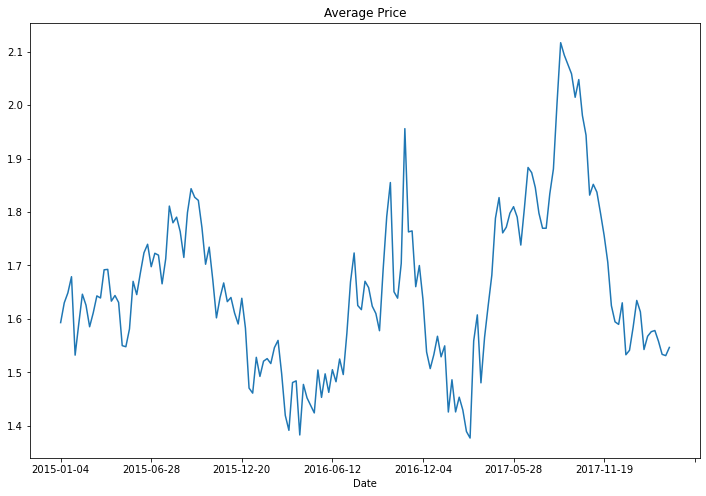

In [102]:
byDate2=df_organic.groupby("Date").mean()
plt.figure(figsize=(12,8))
byDate2["AveragePrice"].plot()
plt.title("Average Price")

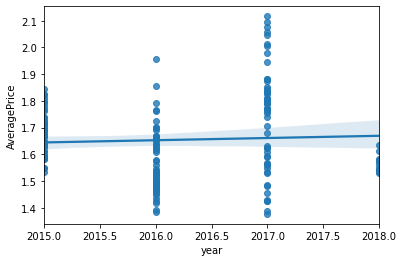

In [103]:
sns.regplot(x="year", y="AveragePrice", data=byDate2)

## Dummy Variables:

In [104]:
dummies2 = pd.get_dummies(df_conventional.drop(["AveragePrice"], axis = 1))
target2 = df_conventional["AveragePrice"]

## Split to Training and Testing

In [105]:
from sklearn.model_selection import train_test_split
x2_train, x2_test, y2_train, y2_test = train_test_split(dummies2,target2,test_size=0.2, random_state = 0)

## Model - Linear Regression

In [106]:
from sklearn.linear_model import LinearRegression
lr2=LinearRegression()
lr2.fit(x2_train,y2_train)
org_pred=lr2.predict(x2_test)

## Accuracy Check

In [138]:
from sklearn import metrics
print("MAE: ", metrics.mean_absolute_error(y2_test, org_pred))
print("MSE: ", metrics.mean_squared_error(y2_test, org_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y2_test, org_pred)))
print("R2: ", metrics.r2_score(y2_test, org_pred))

MAE:  0.09424913008239251
MSE:  0.015124494798486526
RMSE:  0.12298168480910694
R2:  0.7750927919390991


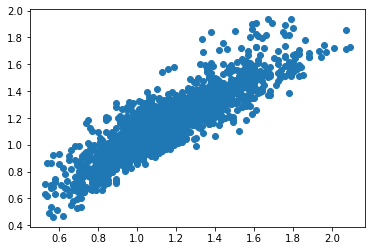

In [110]:
plt.scatter(x=y2_test,y=org_pred)

### We can see here that there wasn't a difference in the accuracy of the model between the types.

# FIN